<a href="https://colab.research.google.com/github/darylsilva/DarylSilva/blob/master/Production_Deployment_working_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 35.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is inc

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import fastai
from fastbook import *

In [5]:
folder = 'black'
file = 'urls_black.csv'

In [6]:
folder = 'teddys'
file = 'urls_teddys.csv'

In [7]:
folder = 'grizzly'
file = 'urls_grizzly.csv'

In [8]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [9]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [10]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

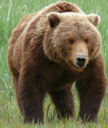

In [11]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [13]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [14]:
fns = get_image_files(path)
fns

(#558) [Path('bears/teddy/a53a57df-ea41-4b59-979d-9aa923fb6b03.jpg'),Path('bears/teddy/7f17e4be-af73-4c31-a91b-2c182b11c724.png'),Path('bears/teddy/f8fe25d6-e9be-40d1-8845-cad2b1a779d3.jpg'),Path('bears/teddy/5ae62399-0e6c-451a-8a9e-c5dc66018922.jpg'),Path('bears/teddy/3b56e688-1760-47ba-8bcb-454b8f22e4e8.jpg'),Path('bears/teddy/b3283ac1-c38e-4a5d-94d6-3a61dd0727e1.jpg'),Path('bears/teddy/ba5da1fa-d350-413a-bfe0-19296b438711.jpg'),Path('bears/teddy/f7872c8d-ad4b-46cb-9435-8b5882827b7c.png'),Path('bears/teddy/6cce0ef4-97ec-40c8-8d62-ccce987826af.jpg'),Path('bears/teddy/bbb70e22-9bd2-4ec9-83d8-7e51ed081762.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#29) [Path('bears/teddy/a53a57df-ea41-4b59-979d-9aa923fb6b03.jpg'),Path('bears/teddy/b3283ac1-c38e-4a5d-94d6-3a61dd0727e1.jpg'),Path('bears/teddy/2b4498ad-899b-4430-9a0a-7e4e3d6b6c31.jpg'),Path('bears/teddy/e01e202b-486e-414f-95e6-3413bd6679c9.jpg'),Path('bears/teddy/ea78576d-bf68-40c8-b3d1-269cd5bd02d9.jpg'),Path('bears/teddy/5ab95d69-1d05-45fd-96b1-21962a14064f.JPG'),Path('bears/teddy/e9821e25-d1ef-460b-998e-6604025e02e8.jpg'),Path('bears/teddy/200e0d7c-b257-4488-9cee-bdb167974646.jpg'),Path('bears/teddy/700cd410-7de4-4271-b84d-76be7cc7722b.jpg'),Path('bears/teddy/d6511399-2a0f-43d4-8604-584fdac89b71.jpg')...]

In [16]:
failed.map(Path.unlink);

In [17]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [18]:
dls = bears.dataloaders(path)

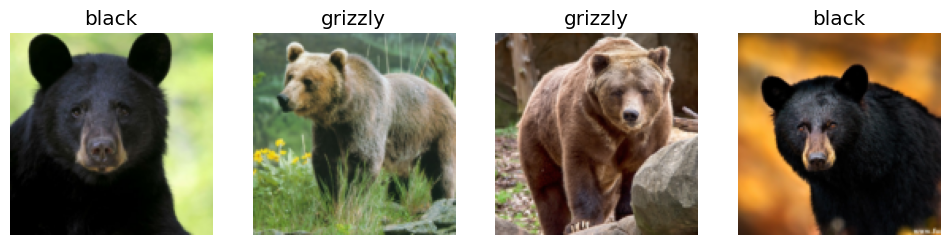

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

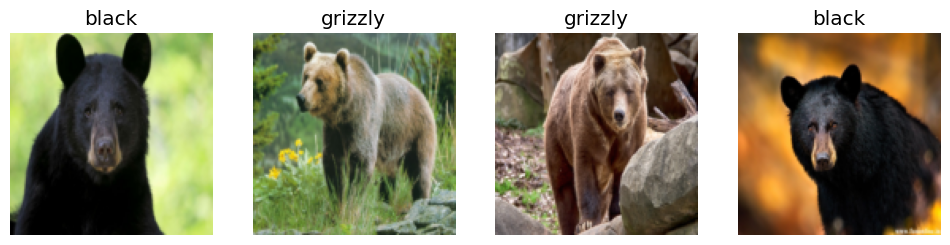

In [20]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

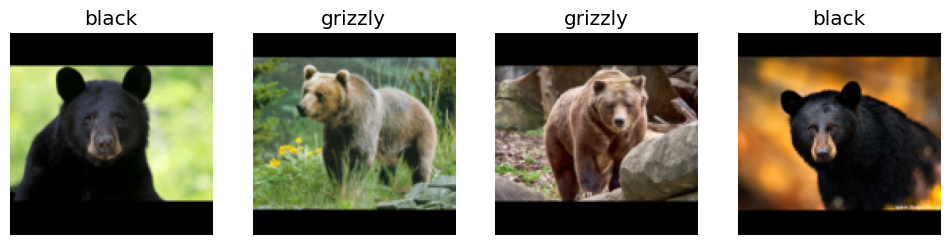

In [21]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

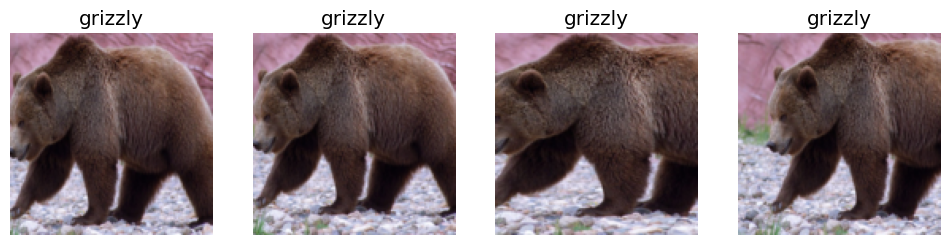

In [22]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

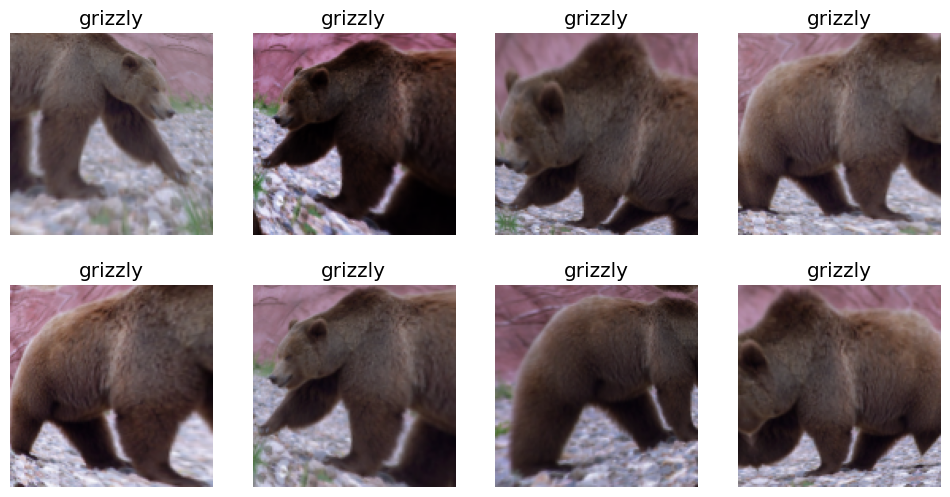

In [23]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [24]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.9MB/s]


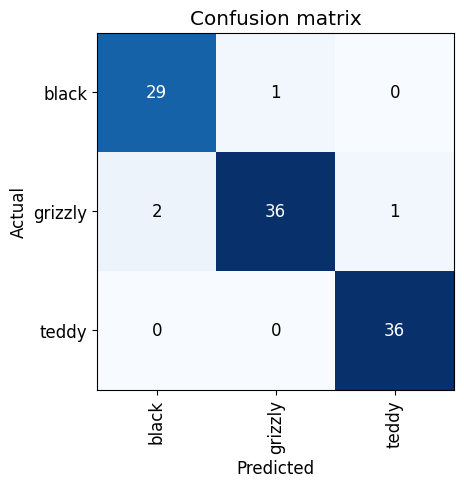

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

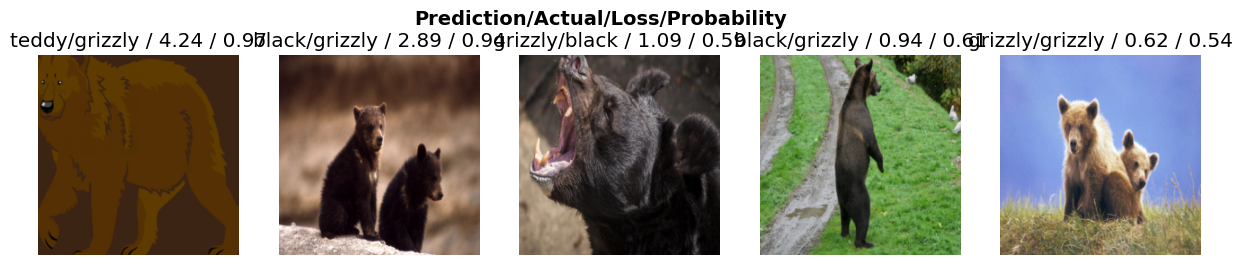

In [30]:
interp.plot_top_losses(5, nrows=1)

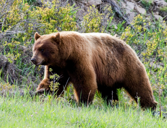

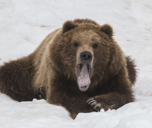

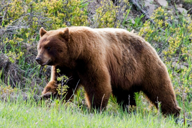

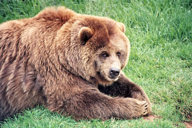

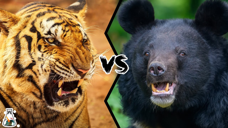

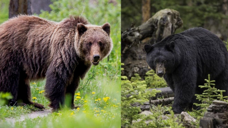

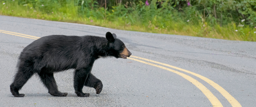

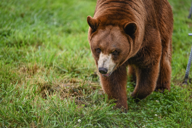

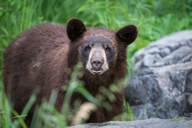

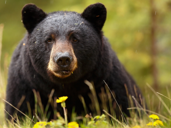

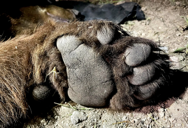

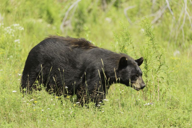

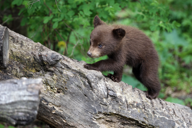

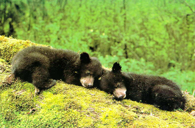

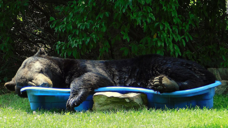

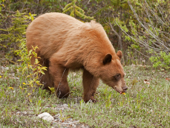

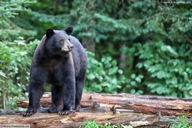

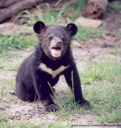

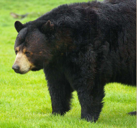

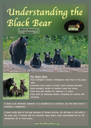

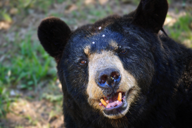

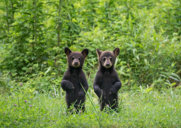

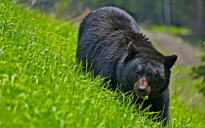

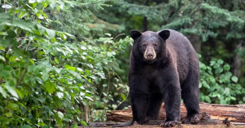

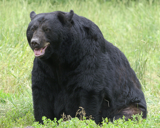

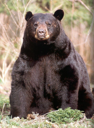

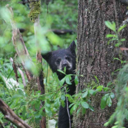

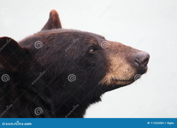

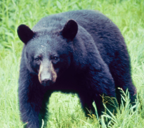

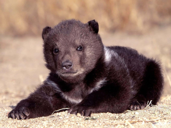

In [31]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [32]:
#hide output
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [33]:
#delete unwanted images by removing the links.
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [34]:
#update the modified lables in the path folder.
for idx,cat in cleaner.change():
    real_dst = os.path.join(path/cat, cleaner.fns[idx].name)
    if os.path.exists(real_dst):
        old_file_path = cleaner.fns[idx]
        old_cat = old_file_path.parent.stem
        new_file_path = f'{path/cat/old_cat}_{str(old_file_path.name.replace(" ","").lower())}'
        shutil.move(str(cleaner.fns[idx]), new_file_path)
    else:
        shutil.move(str(cleaner.fns[idx]), path/cat)

In [35]:
#export your entire model along with the dataloader info.
learn.export()

In [36]:
#fast.ai saves the exported model as .pkl file that can be used for production.
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [38]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([7.1388e-03, 9.9285e-01, 9.5659e-06]))

In [39]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [40]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [41]:
#hide
# For the book, we can't actually click on the upload button, so add a fake 1
btn_upload=SimpleNamespace(data = ['images/grizzly.jpg'])

In [42]:
img = PILImage.create(btn_upload.data[-1])

In [43]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [44]:
pred,pred_idx,probs = learn_inf.predict(img)

In [45]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9929')

In [46]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [47]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [48]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [49]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])